In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
import os
os.chdir('../')

Loaded data for Wheat in Y2021.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 7 trade communities.


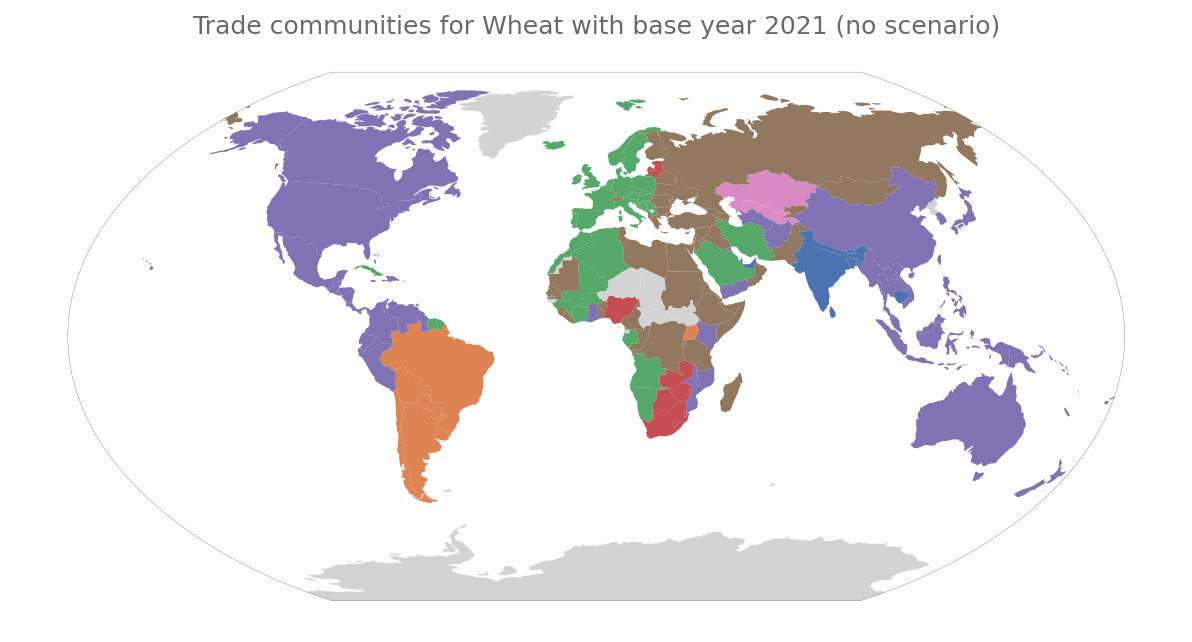

In [2]:
base_wheat = PyTradeShifts(
    "Wheat",
    2021,
    region="Global",
    cd_kwargs={"seed": 2},
    make_plot=True,
)

Loaded data for Wheat in Y2021.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario LoI Wheat.
Built trade graph.
Found 7 trade communities.


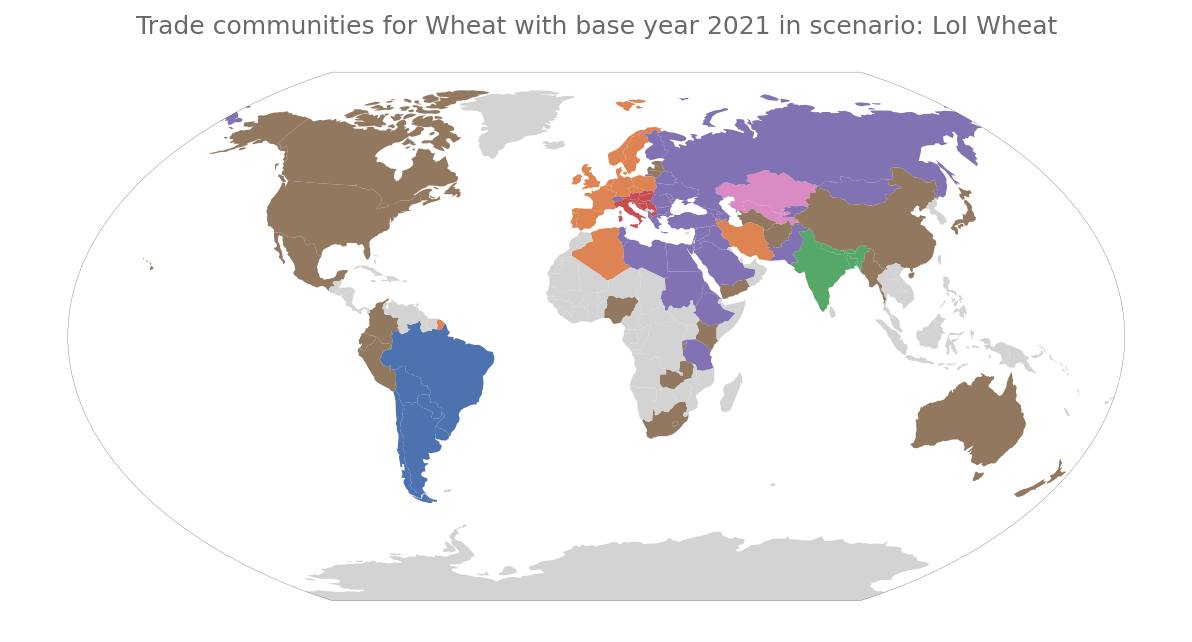

In [5]:
LoI_Wheat = PyTradeShifts(
    crop="Wheat",
    region="Global",
    #with_preprocessing=True,
    base_year=2021,
    scenario_file_name="losing_industry/Wheat2mean_values.csv",
    scenario_name="LoI Wheat",
    cd_kwargs={"seed": 2},
    make_plot=True,
)

In [4]:
comparison = Postprocessing([base_wheat, LoI_Wheat])

Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping c